In [6]:
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from pandas.plotting import register_matplotlib_converters

from sklearn.datasets import load_iris
from tensorflow.keras.layers import Dense
from tensorflow.keras import Input, Model



data, target = load_iris(return_X_y=True)
X = data[:, (0, 1, 2)]
Y = data[:, 3]
Z = target

inputs = Input(shape=(3,))
x = Dense(16, activation='relu')(inputs)
x = Dense(32, activation='relu')(x)
output1 = Dense(1)(x)
output2 = Dense(3, activation='softmax')(x)

model = Model(inputs=inputs, outputs=[output1, output2])

model.compile(loss=['mae', 'sparse_categorical_crossentropy'], optimizer='adam')

history = model.fit(X, 
                    [Y, Z],
                    validation_split=0.1,
                    epochs=10, 
                    batch_size=8)


Epoch 1/10
17/17 [==============================] - 1s 12ms/step - loss: 4.9696 - dense_10_loss: 3.3103 - dense_11_loss: 1.6593 - val_loss: 4.6391 - val_dense_10_loss: 3.6396 - val_dense_11_loss: 0.9995
Epoch 2/10
17/17 [==============================] - 0s 3ms/step - loss: 3.5393 - dense_10_loss: 2.0895 - dense_11_loss: 1.4497 - val_loss: 3.1688 - val_dense_10_loss: 2.3037 - val_dense_11_loss: 0.8652
Epoch 3/10
17/17 [==============================] - 0s 3ms/step - loss: 2.3397 - dense_10_loss: 1.0474 - dense_11_loss: 1.2922 - val_loss: 2.1442 - val_dense_10_loss: 1.2222 - val_dense_11_loss: 0.9220
Epoch 4/10
17/17 [==============================] - 0s 3ms/step - loss: 1.6542 - dense_10_loss: 0.4081 - dense_11_loss: 1.2460 - val_loss: 1.5593 - val_dense_10_loss: 0.5957 - val_dense_11_loss: 0.9637
Epoch 5/10
17/17 [==============================] - 0s 2ms/step - loss: 1.4793 - dense_10_loss: 0.2792 - dense_11_loss: 1.2001 - val_loss: 1.6198 - val_dense_10_loss: 0.6601 - val_dense_11_lo

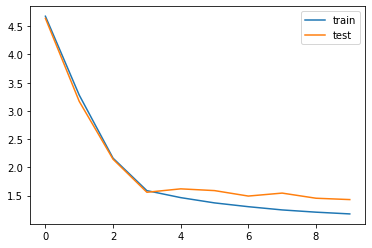

In [7]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();